[ 2  4  8 16]
(7, 4, 10) (7, 4, 10)


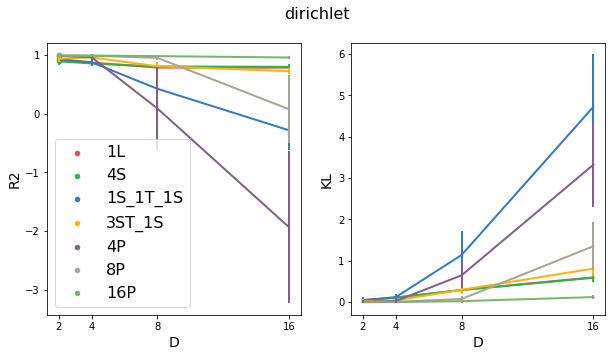

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from plot_utils import plotCategoricalPerformance

exp_fam = 'dirichlet';

flow_strings = ['1L', '4S', '1S_1T_1S', '3ST_1S', '4P', '8P', '16P'];
#flow_strings = ['1S', '2S', '1S_1T_1S', '4S', '1S_1T_1S_1T_1S_1T_1S'];
num_flow_strings = len(flow_strings);

datadir = '/Users/sbittner/Documents/efn/results/expressivity/';

for i in range(num_flow_strings):
    fname = datadir + 'flow_expressivity_test_%s_%s.npz' % (exp_fam, flow_strings[i]);
    X = np.load(fname);
    if (i==0):
        Ds = X['Ds'];
        R2s_i = X['R2s'];
        num_Ds = Ds.shape[0];
        num_etas = R2s_i.shape[1];
        R2s = np.zeros((num_flow_strings, num_Ds, num_etas));
        KLs = np.zeros((num_flow_strings, num_Ds, num_etas));
    R2s[i] = X['R2s'];
    KLs[i] = X['KLs'];

print(Ds);
fontsize = 14;
dotsize = 20;
x = np.array(Ds);
print(R2s.shape, KLs.shape);
legendstrs = [];
fig = plt.figure(figsize=(10, 5));
ax = fig.add_subplot(1,2,1);
plotCategoricalPerformance(x, R2s, flow_strings, plottype='errorBar', dotsize=dotsize);
ax.set_xticks(x);
ax.set_xticklabels(Ds);
plt.xlabel('D', fontsize=fontsize);
plt.ylabel('R2', fontsize=fontsize);
#plt.ylim([0, 1.02]);

ax = fig.add_subplot(1,2,2);
plotCategoricalPerformance(x, KLs, plottype='errorBar', dotsize=dotsize);
ax.set_xticks(x);
ax.set_xticklabels(Ds);
plt.xlabel('D', fontsize=fontsize);
plt.ylabel('KL', fontsize=fontsize);
#plt.ylim([0, 1]);
plt.suptitle(exp_fam, fontsize=fontsize+2);
plt.show();